## **Load data**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive').

In [4]:
#pip install pandas

In [5]:
#!pip install matplotlib
#!pip install seaborn

In [6]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

ratings=pd.read_csv('olist_order_reviews_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
orderitems=pd.read_csv('olist_order_items_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
category=pd.read_csv('product_category_name_translation.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')

## **Data Cleaning**

In [3]:
df=pd.merge(customers, orders, on='customer_id', how='inner')
df=df.merge(ratings, on="order_id", how='inner')
df=df.merge(orderitems, on="order_id", how='inner')
df=df.merge(products, on="product_id", how='inner')
df=df.merge(payments, on="order_id", how='inner')
df=df.merge(sellers, on='seller_id', how='inner')
df=df.merge(category, on='product_category_name', how='inner')
df.shape

(115609, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [5]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0


In [6]:
df.describe(include='object').transpose()

,count,unique,top,freq
customer_id,115609,96516,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,115609,93396,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,115609,4093,sao paulo,18267
customer_state,115609,27,SP,48798
order_id,115609,96516,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,115609,7,delivered,113210
order_purchase_timestamp,115609,86415,8/8/2017 20:26,63
order_approved_at,115595,49475,10/1/2018 10:32,118
order_delivered_carrier_date,114414,60487,10/8/2017 11:58,63
order_delivered_customer_date,113209,74373,14/8/2017 12:46,63


In [7]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df=df.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_comment_title','review_creation_date','review_answer_timestamp'], axis=1)

In [10]:
df.shape

(115609, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   review_id                      115609 non-null  object 
 9   review_score                   115609 non-null  int64  
 10  review_comment_message         48906 non-null   object 
 11  order_item_id                  115609 non-null  int64  
 12  product_id                    

In [12]:
print(df['customer_city'].unique())
print(df['customer_state'].unique())
print(df['order_status'].unique())
print(df['payment_sequential'].unique())
print(df['payment_type'].unique())
print(df['payment_installments'].unique())
print(df['seller_city'].unique())
print(df['seller_state'].unique())

['franca' 'santarem' 'nova santa rita' ... 'mocajuba' 'sabaudia'
 'nova guataporanga']
['SP' 'PA' 'RS' 'RJ' 'SC' 'MG' 'MT' 'BA' 'ES' 'PR' 'MS' 'CE' 'RN' 'TO'
 'MA' 'GO' 'PI' 'PE' 'DF' 'PB' 'AL' 'SE' 'RO' 'AM' 'RR' 'AP' 'AC']
['delivered' 'shipped' 'invoiced' 'processing' 'canceled' 'unavailable'
 'approved']
[ 1  2  3  4  5  7  6 15  9 11  8 14 13 19 10 17 12 16 18 21 20 26 25 24
 22 23 27 29 28]
['credit_card' 'boleto' 'voucher' 'debit_card']
[ 2  1  7 10  5  3  6 13  8  4  9 18 12 15 14 11 17 20 24 16  0 21 23 22]
['itaquaquecetuba' 'salto' 'blumenau' 'sao paulo' 'pinhais' 'mogi guacu'
 'uba' 's jose do rio preto' 'curitiba' 'araraquara' 'santo andre'
 'nova friburgo' 'sao bernardo do campo' 'bady bassitt' 'guarulhos'
 'lajeado' 'cambe' 'portoferreira' 'osasco' 'ponta grossa'
 'lencois paulista' 'cataguases' 'cascavel' 'ibitinga' 'rio de janeiro'
 'taubate' 'piracicaba' 'porto alegre' 'amparo' 'toledo' 'limeira'
 'uberlandia' 'aruja' 'betim' 'porto ferreira' 'vassouras' 'foz do iguac

In [13]:
print("Number of Customer City: ",df['customer_city'].nunique())
print("Number of Customer State: ",df['customer_state'].nunique())
print("Order Status Types: ",df['order_status'].nunique())
print("Payment Sequential Types: ",df['payment_sequential'].nunique())
print("Number of Payment Types: ",df['payment_type'].nunique())
print("Number of Payment Installments: ",df['payment_installments'].nunique())
print("Number of Seller City: ",df['seller_city'].nunique())
print("Number of Seller State: ",df['seller_state'].nunique())

Number of Customer City:  4093
Number of Customer State:  27
Order Status Types:  7
Payment Sequential Types:  29
Number of Payment Types:  4
Number of Payment Installments:  24
Number of Seller City:  604
Number of Seller State:  23


In [14]:
df.describe(include='object').transpose()

,count,unique,top,freq
customer_id,115609,96516,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,115609,93396,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,115609,4093,sao paulo,18267
customer_state,115609,27,SP,48798
order_id,115609,96516,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,115609,7,delivered,113210
order_purchase_timestamp,115609,86415,8/8/2017 20:26,63
review_id,115609,96319,eef5dbca8d37dfce6db7d7b16dd0525e,63
review_comment_message,48906,35172,Muito bom,253
product_id,115609,32171,aca2eb7d00ea1a7b8ebd4e68314663af,533


In [15]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99730.000000


In [16]:
df['review_comment_message']=df['review_comment_message'].apply(str)

In [17]:
#pd.set_option('max_columns', None)

In [18]:
#pd.set_option("max_rows", None)

In [19]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_id,review_score,...,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,...,21.88,moveis_escritorio,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,24.90,moveis_escritorio,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,24.90,moveis_escritorio,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,...,15.62,moveis_escritorio,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,...,30.59,moveis_escritorio,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,...,39.19,la_cuisine,1,credit_card,10,232.19,89701,concordia,SC,la_cuisine
115605,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,...,37.70,la_cuisine,1,credit_card,8,426.70,89701,concordia,SC,la_cuisine
115606,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,...,21.46,la_cuisine,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine
115607,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,26.18,la_cuisine,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine


### ***Feature Engineering***

In [20]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [21]:
df.product_category.value_counts()

Electronics                30256
Furniture                  28565
Entertainment              13821
Beauty & Health            13558
Home & Garden              13106
Fashion                     9950
Books & Stationery          3499
Industry & Construction     1669
Food & Drinks               1185
Name: product_category, dtype: int64

In [22]:
df['product_category_name_english'] = df['product_category_name_english'].str.replace('_', ' ')

In [23]:
df['payment_type'] = df['payment_type'].str.replace('_', ' ')

In [24]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_id,review_score,...,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,...,moveis_escritorio,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,moveis_escritorio,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,...,moveis_escritorio,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,...,moveis_escritorio,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,...,moveis_escritorio,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,...,la_cuisine,1,credit card,10,232.19,89701,concordia,SC,la cuisine,Home & Garden
115605,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,...,la_cuisine,1,credit card,8,426.70,89701,concordia,SC,la cuisine,Home & Garden
115606,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,...,la_cuisine,1,credit card,3,160.46,89701,concordia,SC,la cuisine,Home & Garden
115607,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,la_cuisine,1,credit card,2,55.18,89701,concordia,SC,la cuisine,Home & Garden


## **EDA**

## Univariate Analysis

In [25]:
sns.set(font_scale=0.8)

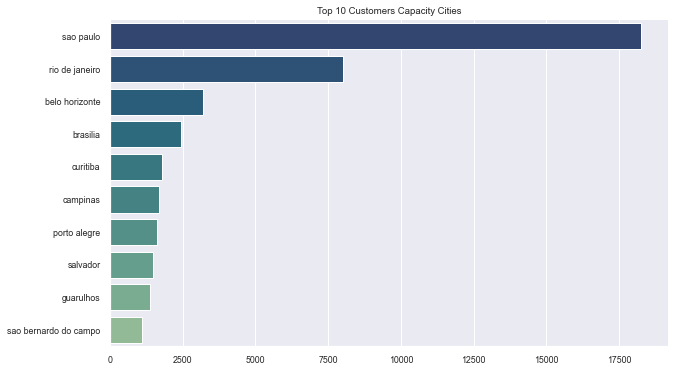

In [26]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

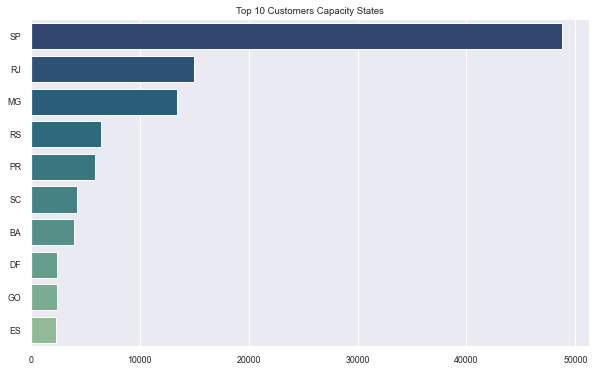

In [27]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

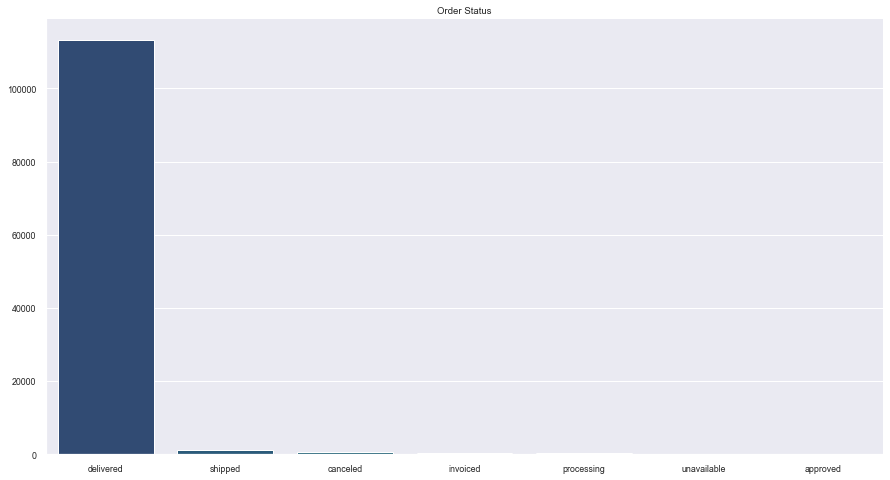

In [28]:
plt.figure(figsize=[15, 8])
order_status_index = [str(i) for i in df.order_status.value_counts().index]
sns.barplot(x = order_status_index, y= df.order_status.value_counts().values, palette= 'crest_r')
plt.title('Order Status')
sns.despine()

Due to the extreme imbalance and lack of variance in the feature, we should drop it.

In [29]:
df.drop('order_status', axis=1, inplace=True)

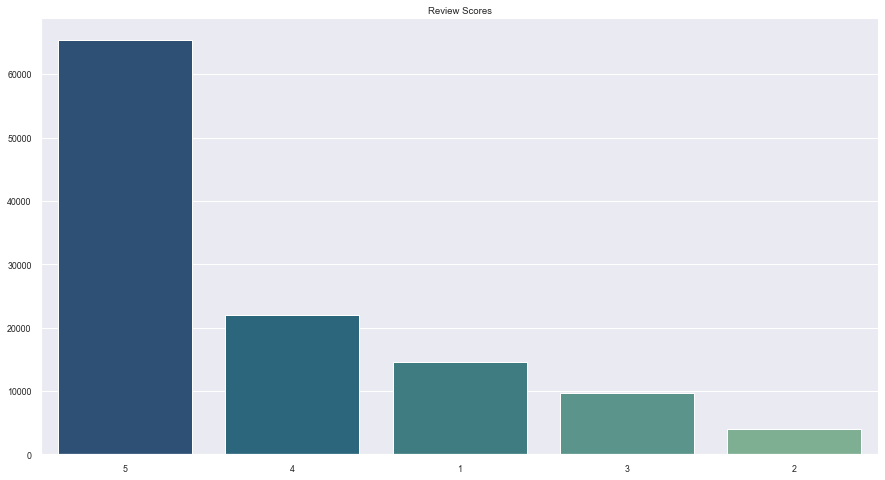

In [30]:
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


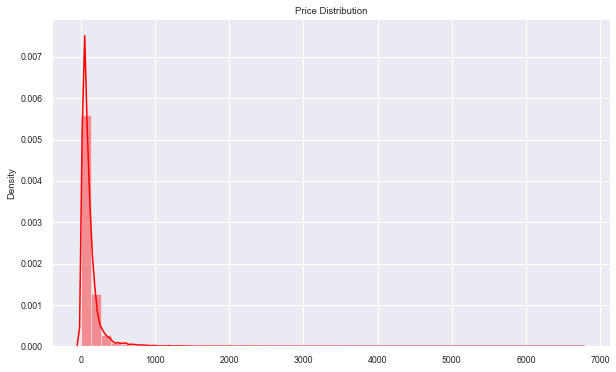

In [31]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.price, color='red')
plt.title('Price Distribution')
sns.despine()

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


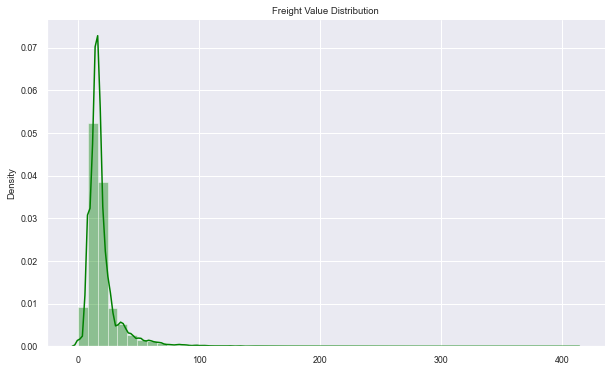

In [32]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.freight_value, color='green')
plt.title('Freight Value Distribution')
sns.despine()

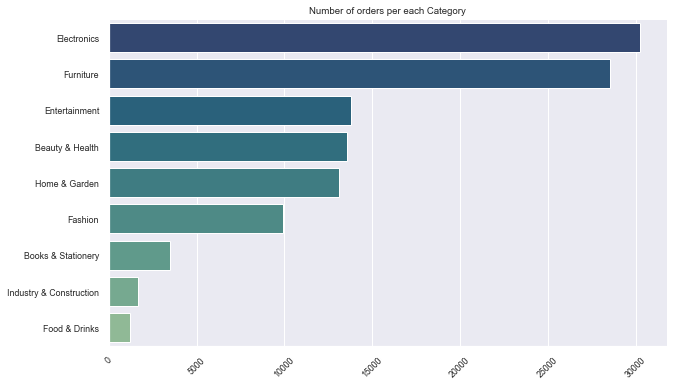

In [33]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

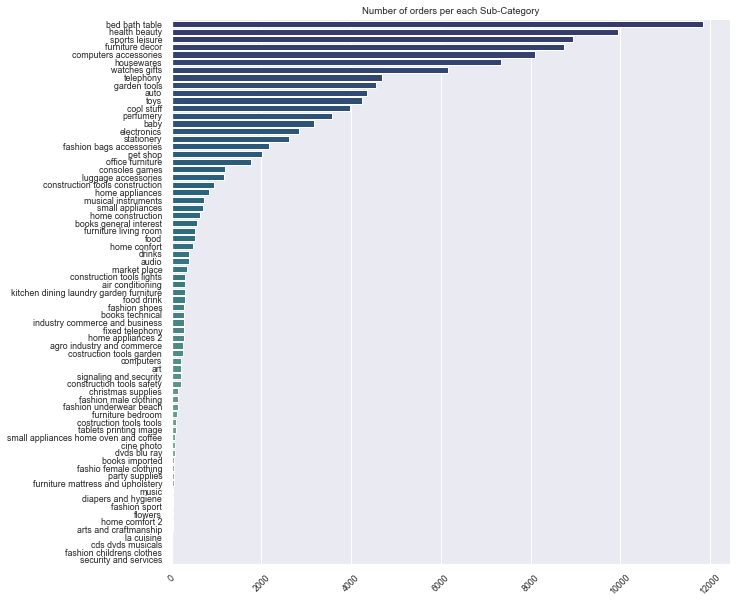

In [34]:
plt.figure(figsize=[10, 10])
sns.barplot(x = df.product_category_name_english.value_counts().values, y = df.product_category_name_english.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Sub-Category')
plt.xticks(rotation = 45)
sns.despine()

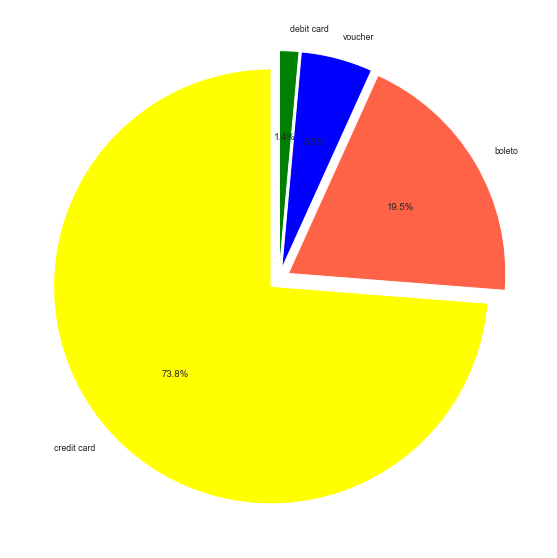

In [35]:
plt.figure(figsize=[10, 10])
plt.pie(df.payment_type.value_counts().values, explode=(0.05, 0.05, 0.05, 0.05), labels= df.payment_type.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['yellow','tomato','blue','green']);

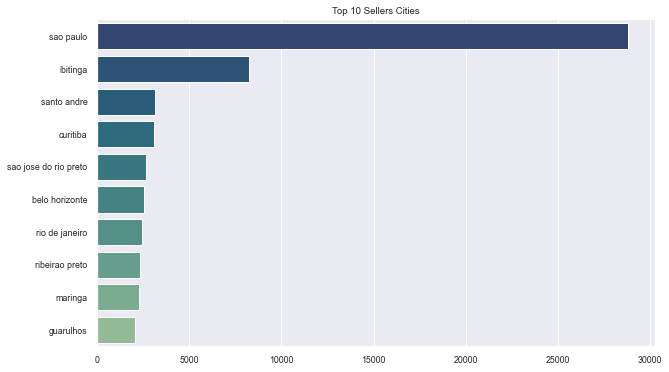

In [36]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

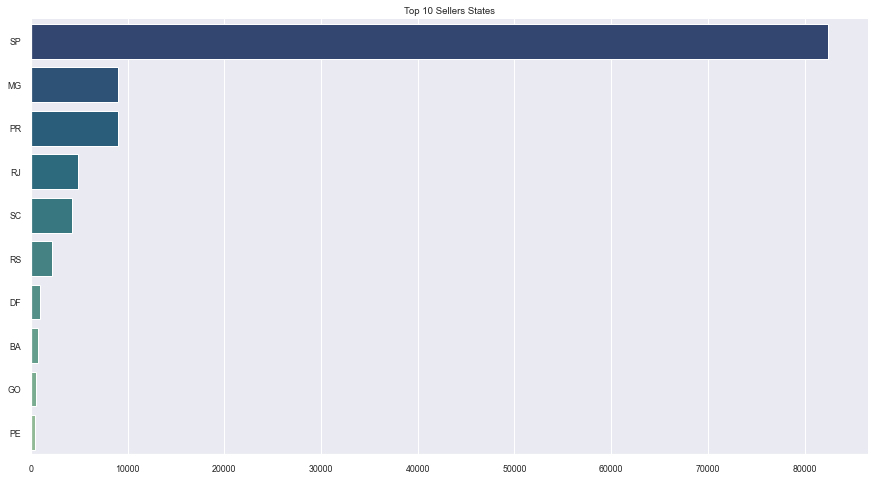

In [37]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

In [38]:
df.payment_installments.value_counts()

1     57599
2     13404
3     11551
4      7855
10     6785
5      5928
8      5013
6      4546
7      1789
9       710
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [39]:
df[df.payment_installments == 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category
29768,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,15/5/2018 16:25,bc5dca6c957c328b1cbff760b0841fd2,5,nan,...,utilidades_domesticas,2,credit card,0,129.94,31573,belo horizonte,MG,housewares,Home & Garden
29769,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,15/5/2018 16:25,bc5dca6c957c328b1cbff760b0841fd2,5,nan,...,utilidades_domesticas,2,credit card,0,129.94,31573,belo horizonte,MG,housewares,Home & Garden
98815,5e5794daaa13f73e2f1cdb4114529843,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,744bade1fcf9ff3f31d860ace076d422,22/4/2018 11:34,c56b4b7042f417e70d3dc5340deb23fe,5,nan,...,telefonia,2,credit card,0,58.69,14401,franca,SP,telephony,Electronics


In [40]:
#drop indices
df.drop([29768, 29769, 98815], inplace=True)
#reset Index
df.reset_index(inplace= True, drop= True)

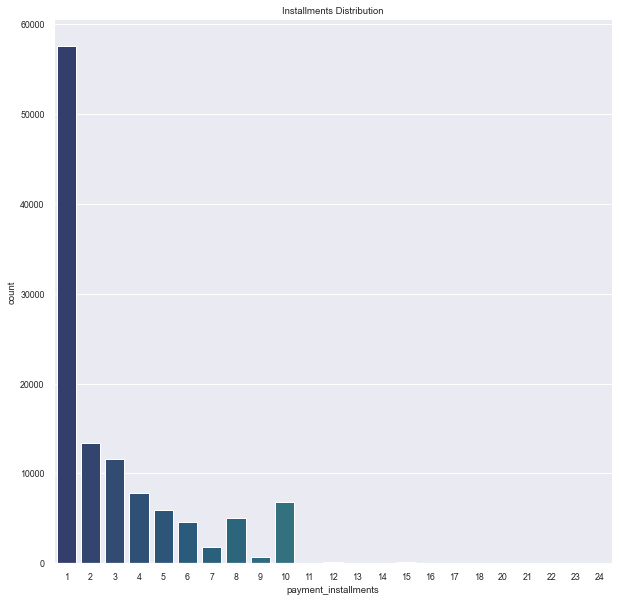

In [41]:
plt.figure(figsize=[10, 10])
sns.countplot(x = df.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


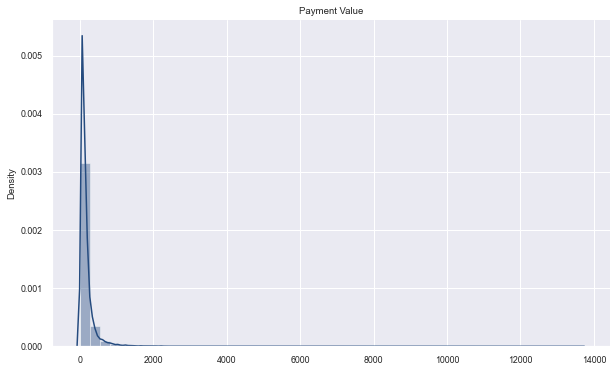

In [42]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.payment_value)
plt.title('Payment Value')
sns.despine()

## Multivariate Analysis

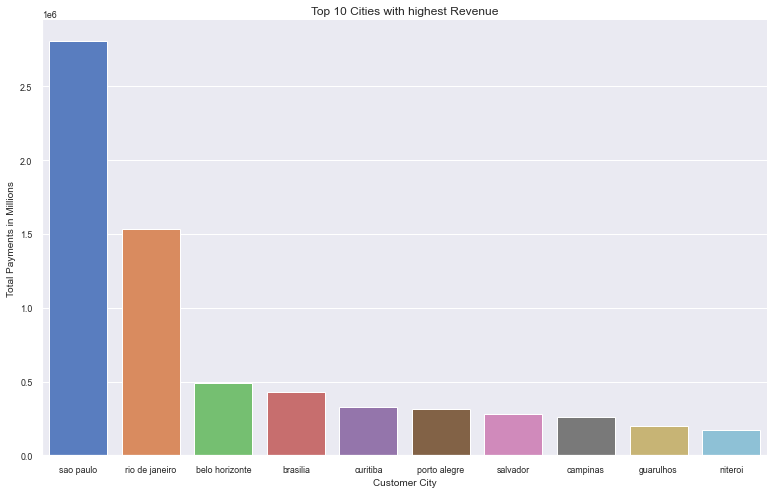

In [43]:
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'muted')
plt.title('Top 10 Cities with highest Revenue', fontsize= 12)
plt.xlabel('Customer City', fontsize= 10)
plt.ylabel('Total Payments in Millions', fontsize= 10)
sns.despine()

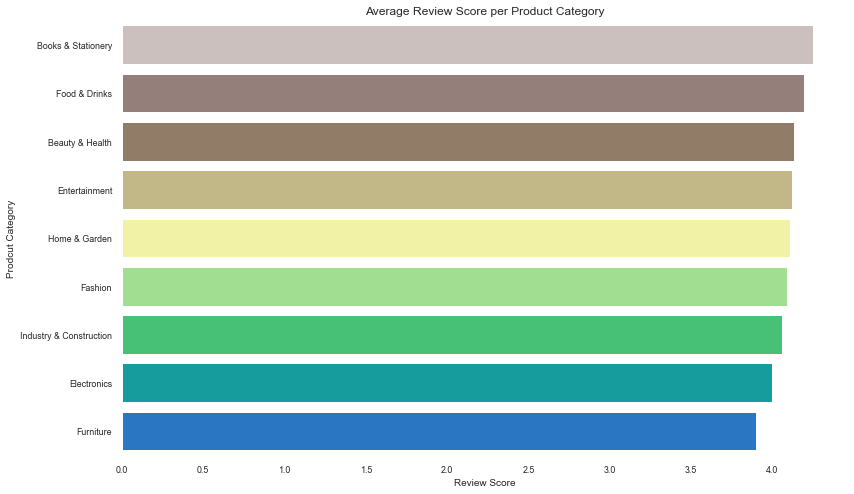

In [44]:
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'terrain_r')
plt.title('Average Review Score per Product Category', fontsize= 12)
plt.xlabel('Review Score', fontsize= 10)
plt.ylabel('Prodcut Category', fontsize= 10)
ax = plt.gca()
ax.set_frame_on(False);

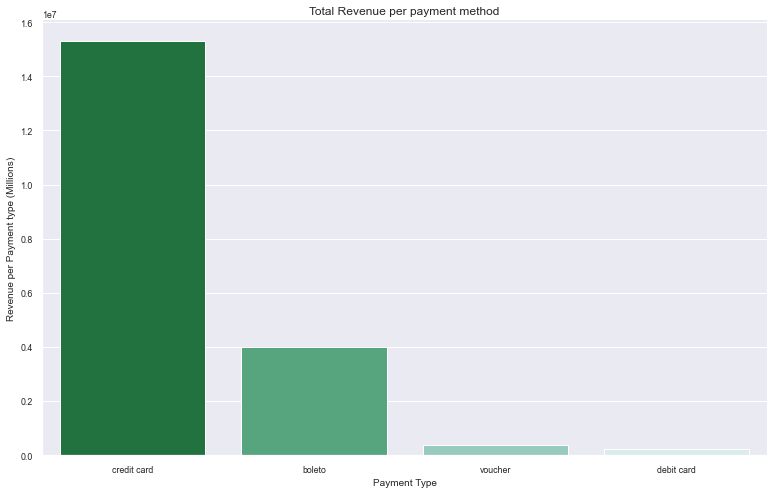

In [45]:
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

plt.figure(figsize=[13, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'BuGn_r')
plt.title('Total Revenue per payment method', fontsize= 12)
plt.xlabel('Payment Type', fontsize= 10)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 10)
sns.despine()

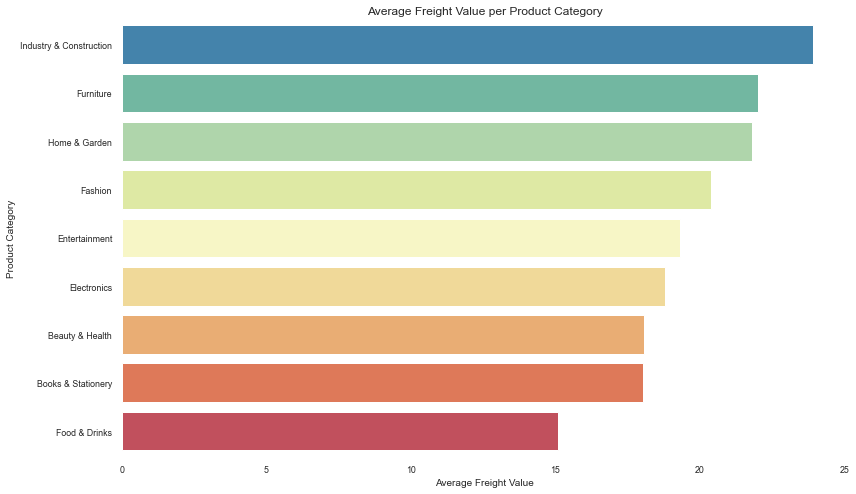

In [46]:
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[13, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'Spectral_r')
plt.title('Average Freight Value per Product Category', fontsize= 12)
plt.xlabel('Average Freight Value',fontsize= 10)
plt.ylabel('Product Category', fontsize= 10)
ax = plt.gca()
ax.set_frame_on(False);

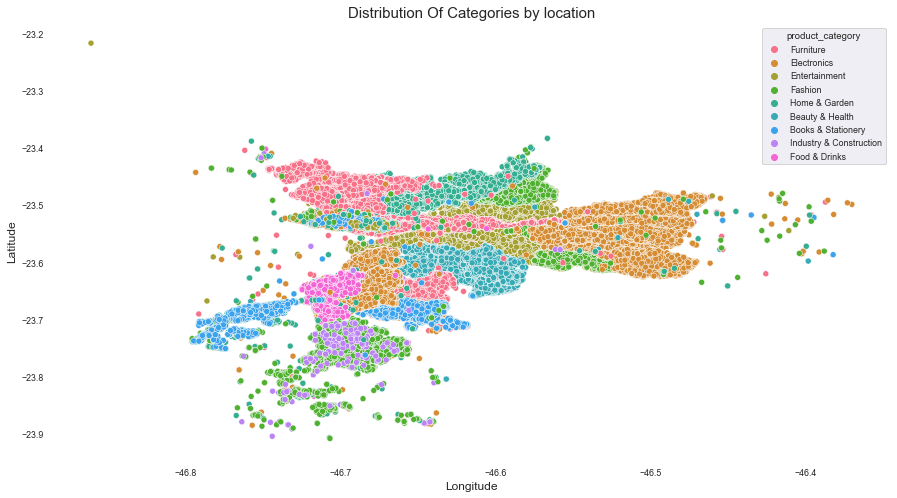

In [47]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation.geolocation_lng, y = geolocation.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

## **Data PreProcessing**

In [48]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied',
                  3 : 'Neutral',
                  4 : 'Satisfied',
                  5 : 'Satisfied'}

df['review'] = df['review_score'].map(encoded_class)

In [49]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115601,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,27/5/2017 14:03,d80889ac5e64526148081227745e82d7,5,Ótimo vendedor,...,1,credit card,10,232.19,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115602,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,31/3/2018 19:17,45c02db2f81c1968c58f08d46694213d,4,nan,...,1,credit card,8,426.70,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115603,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,28/8/2017 9:48,f8c39654aa2349dfb94f274ccefe7c80,5,nan,...,1,credit card,3,160.46,89701,concordia,SC,la cuisine,Home & Garden,Satisfied
115604,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,31/7/2017 18:10,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,Recomendo,...,1,credit card,2,55.18,89701,concordia,SC,la cuisine,Home & Garden,Satisfied


<AxesSubplot:>

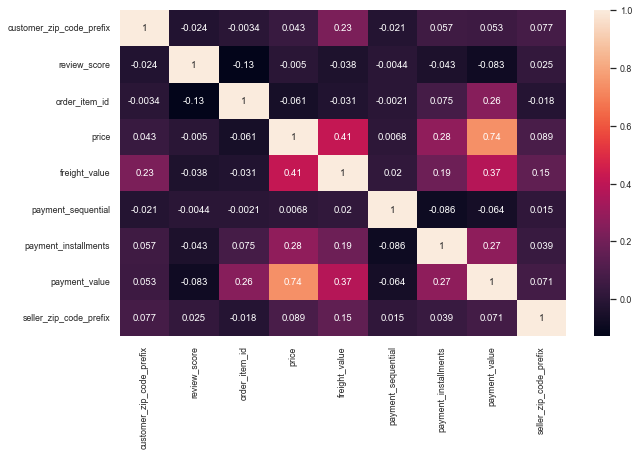

In [50]:
import seaborn as sns
plt.figure(figsize= [10, 6])
sns.heatmap(df.corr(), annot= True)

## **NLP**

In [51]:
df.dropna(inplace= True)
df.reset_index(inplace= True, drop= True)

In [52]:
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_purchase_timestamp         0
review_id                        0
review_score                     0
review_comment_message           0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
product_category                 0
review                           0
dtype: int64

In [53]:
df2=df[0:20000]
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,984e2ab6a072e04516bca3040606d641,9ec2ff36367734940e440491b6e4f59a,35600,bom despacho,MG,ee8725c782f35716fe7a9e445bbf0a78,11/9/2017 9:46,6f8f1480a063dfa15164baddcb4dc768,5,nan,...,1,boleto,1,92.90,89120,timbo,SC,sports leisure,Entertainment,Satisfied
19996,e8c9e9de9411a9a78629b376f75b18b3,acc71fc18279e5859ab1e867a2e6aec4,89245,araquari,SC,5d333a08c9bce16bf18ed14c4469c1ce,3/10/2017 22:51,0214baa1c6d16bbfe6b016f8e4c8dd6a,1,"Recebi, antes do prazo de entrega. Porém no me...",...,1,credit card,1,79.51,89120,timbo,SC,sports leisure,Entertainment,Not Satisfied
19997,48a0d58b5c9638c5d1bd192c4143f971,4426a915a8e65d0f7c66a021b1590559,95630,parobe,RS,f3946e7bb785f6ad1f6747355f2f0707,13/9/2017 16:48,65613a7e99fb0b7dfa2f37a1aebe8680,5,nan,...,1,boleto,1,82.12,89120,timbo,SC,sports leisure,Entertainment,Satisfied
19998,764b644da47fd5bb41b7d78590cffaa6,edb02b1c1d841706083765e2c524fd01,13024,campinas,SP,13c8da80a4b1a89a063dee494d324423,5/2/2017 19:34,9ef12de4c2174d61a6c6848b8a6a0b03,5,nan,...,1,boleto,1,81.57,89120,timbo,SC,sports leisure,Entertainment,Satisfied


In [54]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [55]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
corpus = []

for i in range(df2.shape[0]):
    #remove any special characters or number
    review_comment_message = re.sub('[^a-zA-Z]', ' ', df2.review_comment_message[i])
    #lower text
    review_comment_message = review_comment_message.lower()
    #remove any spaces
    review_comment_message = review_comment_message.strip()
    #stemming
    review_comment_message = review_comment_message.split()
    #stemming words in Portugues
    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]
    #merge
    review_comment_message = ' '.join(review_comment_message)

    corpus.append(review_comment_message)

corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fifi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['nan',
 'gostaria solu precisando produto',
 'gostaria solu precisando produto',
 'produto compat vel valor bonito barato simpl bom custo benef cio',
 'entreg ant prazo',
 'nan',
 'encaix encosto cadeira desalinhado deu trabalho pra encaixar finalment montar produto',
 'bom dia insatisfeita segunda compra poi entregu at at momento n recebi j terminei pagar mercadoria n entregu',
 'entrega demorada',
 'cadeira veio faltando part encosto',
 'cadeira veio faltando part encosto',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'entrega prazo venda ocorreu bem qualidad dess produto deixou desejar',
 'nan',
 'nan',
 'nan',
 'produto entregu avaria solicitado troca',
 'tudo encomendado',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'produto bom conform pre',
 'produto bom conform pre',
 'nan',
 'nan',
 'nan',
 'nan',
 'produto chegou certinho m n veio parafuso presilha realizar montagem comprar part terminar montagem',
 'tima loja recomendo',
 'na

In [56]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TFIDF Vectorizer convert text into numbers
tf = TfidfVectorizer()
comments_new = tf.fit_transform(corpus).toarray()

In [59]:
comments_new = pd.DataFrame(comments_new, columns= tf.get_feature_names())
comments_new

,ab,abaixada,abaixo,abajour,abajur,abdomin,aben,aberta,aberto,aborda,...,ye,yoga,youtub,zafira,zareef,zelador,zelo,zero,zo,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split into train and test

In [60]:
pip install --upgrade scikit-learn

     ---------------------------------------- 9.3/9.3 MB 9.5 MB/s eta 0:00:00
     ------------------------------------- 302.0/302.0 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Anaconda\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [61]:
X = comments_new
y = df2['review']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [67]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#nb = MultinomialNB()
#nb.fit(x_train, y_train)
#y_pred = nb.predict(x_test)

#print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
#print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

#ConfusionMatrixDisplay(nb, x_train, y_train)
#ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test)

In [68]:
#check reasons of non satisfaction 
not_satisfied = df2[df2.review == 'Not Satisfied']
not_satisfied.reset_index(inplace= True, drop= True)

In [69]:
stemmer = PorterStemmer()
corpus = []

for i in range(not_satisfied.shape[0]):
    review_comment_message = re.sub('[^a-zA-Z]', ' ', not_satisfied.review_comment_message[i])
    review_comment_message = review_comment_message.lower()
    review_comment_message = review_comment_message.strip()
    review_comment_message = review_comment_message.split()
    review_comment_message = [stemmer.stem(word) for word in review_comment_message if word not in set(stopwords.words('portuguese'))]
    review_comment_message = ' '.join(review_comment_message)

    corpus.append(review_comment_message)

corpus

['gostaria solu precisando produto',
 'gostaria solu precisando produto',
 'bom dia insatisfeita segunda compra poi entregu at at momento n recebi j terminei pagar mercadoria n entregu',
 'cadeira veio faltando part encosto',
 'cadeira veio faltando part encosto',
 'nan',
 'produto entregu avaria solicitado troca',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'mocho n mese uso part estrutura j est rachando produto p ssima qualidad',
 'n recebi produto satisfa',
 'n recebi produto satisfa',
 'produto veio suport laterai j enviei email n recebi nenhum posicionamento at momento insatisfeito falta organiza',
 'j pedi troca n fizeram',
 'j pedi troca n fizeram',
 'ja passou prazo entrega ainda nao recebi pedido',
 'ja passou prazo entrega ainda nao recebi pedido',
 'falta entregu cadeira',
 'falta entregu cadeira',
 'falta entregu cadeira',
 'ainda n recebi produto sendo assim n posso opinar sobr quanto loja deixa desejar quanto prazo',
 'sistema p ssimo fazer pergunta nada atualiza sobr produt

In [70]:
#!pip install deep_translator

In [71]:
from deep_translator import GoogleTranslator
import random

not_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    not_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    
not_satisfied_trans

['fourth knife key I buy Lannist none I can give it the vectra key something else I want to return it right away I bought it just for fun',
 'We only received four chairs, missing chair delivered as requested',
 "I bought a chair for myself so far I didn't receive it, the company never buys it",
 'product not delivered',
 'technical sheet could be written var would come part bought waiting to receive var whole',
 "I didn't expect low quality product",
 'nan',
 'nan',
 'I already sent a message until today, no response, I only received part of the request',
 'I wanted to call for contact I bought two cofr only the invoice arrived',
 'I only received merchandise another tire I did not receive a tire',
 'nan',
 'nan',
 'chair was missing',
 'nan',
 "I didn't receive product",
 'only four chairs were delivered within the established deadline',
 "I still haven't received the product, the deadline has passed, no one contacts me to say",
 'fetch mail greater weight chair carry home',
 'Mr. di

In [72]:
len(not_satisfied_trans)

1000

In [73]:
#stemming
not_satisfied_final = []

for sent in not_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            not_satisfied_final.append(stemmer.stem(word))

not_satisfied_final

['fourth',
 'knife',
 'key',
 'i',
 'buy',
 'lannist',
 'none',
 'i',
 'give',
 'vectra',
 'key',
 'someth',
 'els',
 'i',
 'want',
 'return',
 'right',
 'away',
 'i',
 'bought',
 'fun',
 'we',
 'receiv',
 'four',
 'chairs,',
 'miss',
 'chair',
 'deliv',
 'request',
 'i',
 'bought',
 'chair',
 'far',
 'i',
 'receiv',
 'it,',
 'compani',
 'never',
 'buy',
 'product',
 'deliv',
 'technic',
 'sheet',
 'could',
 'written',
 'var',
 'would',
 'come',
 'part',
 'bought',
 'wait',
 'receiv',
 'var',
 'whole',
 'i',
 'expect',
 'low',
 'qualiti',
 'product',
 'nan',
 'nan',
 'i',
 'alreadi',
 'sent',
 'messag',
 'today,',
 'response,',
 'i',
 'receiv',
 'part',
 'request',
 'i',
 'want',
 'call',
 'contact',
 'i',
 'bought',
 'two',
 'cofr',
 'invoic',
 'arriv',
 'i',
 'receiv',
 'merchandis',
 'anoth',
 'tire',
 'i',
 'receiv',
 'tire',
 'nan',
 'nan',
 'chair',
 'miss',
 'nan',
 'i',
 'receiv',
 'product',
 'four',
 'chair',
 'deliv',
 'within',
 'establish',
 'deadlin',
 'i',
 'still',
 're

(-0.5, 949.5, 799.5, -0.5)

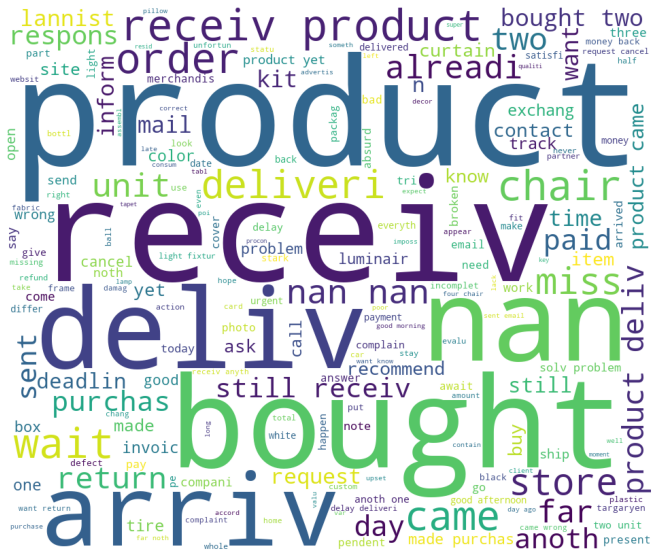

In [74]:
#visualize most common words for not-satisfied using WorldCloud
#!pip install wordcloud
#!pip install --upgrade pip
#!pip install --upgrade pillow
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

not_satisfied_final = ' '.join(not_satisfied_final)
not_satisfied_freq = WordCloud(width=950, height=800, background_color='white').generate(not_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(not_satisfied_freq)
plt.axis("off")

In [75]:
not_satisfied_freq = not_satisfied_freq.process_text(not_satisfied_final)
sorted_word_frequencies = sorted(not_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

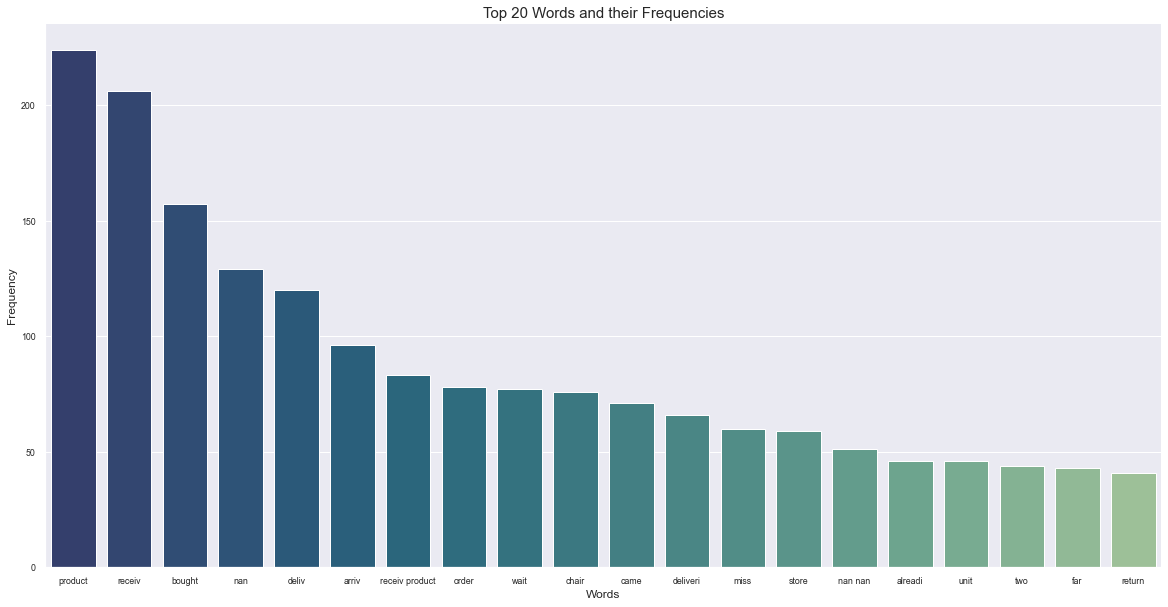

In [76]:
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[0:20][0], y= pd.DataFrame(sorted_word_frequencies)[0:20][1], palette= 'crest_r')
plt.title('Top 20 Words and their Frequencies', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()

# Customer Segmentation using RFM Analysis

In [77]:
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,review_comment_message,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,16/5/2017 15:05,88b8b52d46df026a9d1ad2136a59b30b,4,nan,...,1,credit card,2,146.87,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,9/11/2017 0:50,7fc63200f12eebb5f387856afdd63db8,1,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",...,1,credit card,1,275.79,8577,itaquaquecetuba,SP,office furniture,Furniture,Not Satisfied
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,7/5/2017 20:11,251191809e37c1cffc16865947c18a4d,3,"Produto compatível com seu valor, muito bonito...",...,1,credit card,7,140.61,8577,itaquaquecetuba,SP,office furniture,Furniture,Neutral
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,3/2/2018 19:45,f7123bac5b91a0e2e38d8b41fd1206f4,4,Entregou antes do prazo,...,1,credit card,10,137.58,8577,itaquaquecetuba,SP,office furniture,Furniture,Satisfied


In [78]:
df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])

C:\Users\fifi\AppData\Local\Temp/ipykernel_31612/77448024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])


In [79]:
max_trans_date = max(df2.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 12, 8)

In [80]:
from datetime import datetime

rfm_table=df2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

,order_purchase_timestamp,product_id,payment_value
customer_unique_id,,,
00053a61a98854899e70ed204dd4bafe,282,2,838.36
00115fc7123b5310cf6d3a3aa932699e,685,1,76.11
001928b561575b2821c92254a2327d06,105,1,164.81
002043098f10ba39a4600b6c52fbfe3c,621,1,237.81
002311514717ca8b65b09a26cdf7b91a,163,1,124.32
...,...,...,...
ffe204b1bb8026741b839085b2fd10f2,90,1,156.70
ffee94d548cef05b146d825a7648dab4,133,1,35.36
ffef0ffa736c7b3d9af741611089729b,557,1,139.07


In [81]:
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequency','payment_value':'Monetary'}, inplace=True)
rfm_table

,Recency,Frequency,Monetary
customer_unique_id,,,
00053a61a98854899e70ed204dd4bafe,282,2,838.36
00115fc7123b5310cf6d3a3aa932699e,685,1,76.11
001928b561575b2821c92254a2327d06,105,1,164.81
002043098f10ba39a4600b6c52fbfe3c,621,1,237.81
002311514717ca8b65b09a26cdf7b91a,163,1,124.32
...,...,...,...
ffe204b1bb8026741b839085b2fd10f2,90,1,156.70
ffee94d548cef05b146d825a7648dab4,133,1,35.36
ffef0ffa736c7b3d9af741611089729b,557,1,139.07


In [82]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequency'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

,Recency,Frequency,Monetary,r_score,f_score,m_score
customer_unique_id,,,,,,
00053a61a98854899e70ed204dd4bafe,282,2,838.36,3,4,4
00115fc7123b5310cf6d3a3aa932699e,685,1,76.11,1,1,2
001928b561575b2821c92254a2327d06,105,1,164.81,4,1,3
002043098f10ba39a4600b6c52fbfe3c,621,1,237.81,1,1,4
002311514717ca8b65b09a26cdf7b91a,163,1,124.32,4,1,2
...,...,...,...,...,...,...
ffe204b1bb8026741b839085b2fd10f2,90,1,156.70,4,4,3
ffee94d548cef05b146d825a7648dab4,133,1,35.36,4,4,1
ffef0ffa736c7b3d9af741611089729b,557,1,139.07,1,4,3


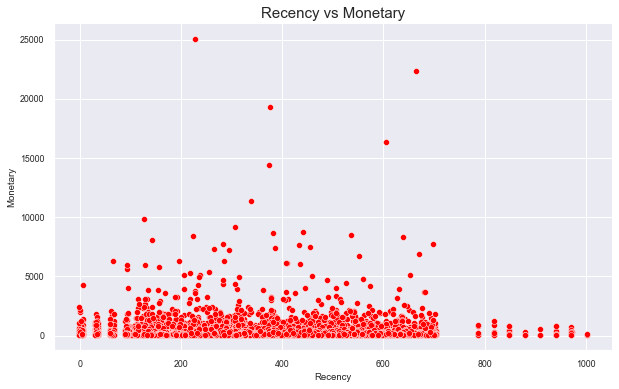

In [83]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', color='red', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

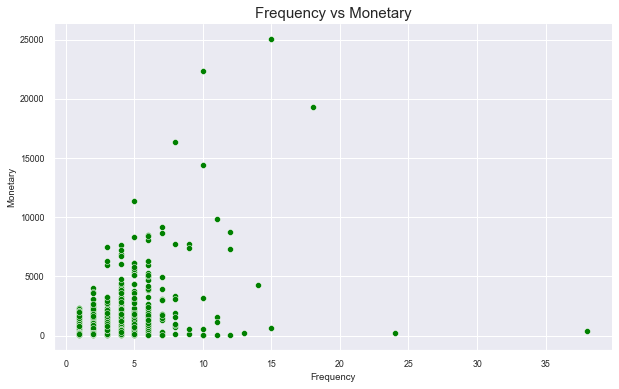

In [84]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequency', y='Monetary', color='green', data=rfm_table)
plt.title('Frequency vs Monetary', fontsize= 15)
sns.despine()

In [85]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score
customer_unique_id,,,,,,,
00053a61a98854899e70ed204dd4bafe,282,2,838.36,3,4,4,344
00115fc7123b5310cf6d3a3aa932699e,685,1,76.11,1,1,2,112
001928b561575b2821c92254a2327d06,105,1,164.81,4,1,3,413
002043098f10ba39a4600b6c52fbfe3c,621,1,237.81,1,1,4,114
002311514717ca8b65b09a26cdf7b91a,163,1,124.32,4,1,2,412
...,...,...,...,...,...,...,...
ffe204b1bb8026741b839085b2fd10f2,90,1,156.70,4,4,3,443
ffee94d548cef05b146d825a7648dab4,133,1,35.36,4,4,1,441
ffef0ffa736c7b3d9af741611089729b,557,1,139.07,1,4,3,143


In [86]:
def customer_segmentation(rfm_score):
  
  if rfm_score >= 444:
    return 'VIP'
  
  elif  rfm_score >= 404 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=364 and rfm_score< 404:
    return 'Loyal'
  
  elif rfm_score>=324 and rfm_score < 364:
    return 'New customer'
  
  elif rfm_score>=284 and rfm_score< 324:
    return 'Potential customer'
  
  elif rfm_score>=244 and rfm_score<284:
    return 'High risk to churn' 
  
  else:
    return 'Lost customer'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmentation)

rfm_table

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,customer_segmentation
customer_unique_id,,,,,,,,
00053a61a98854899e70ed204dd4bafe,282,2,838.36,3,4,4,344,New customer
00115fc7123b5310cf6d3a3aa932699e,685,1,76.11,1,1,2,112,Lost customer
001928b561575b2821c92254a2327d06,105,1,164.81,4,1,3,413,Very Loyal
002043098f10ba39a4600b6c52fbfe3c,621,1,237.81,1,1,4,114,Lost customer
002311514717ca8b65b09a26cdf7b91a,163,1,124.32,4,1,2,412,Very Loyal
...,...,...,...,...,...,...,...,...
ffe204b1bb8026741b839085b2fd10f2,90,1,156.70,4,4,3,443,Very Loyal
ffee94d548cef05b146d825a7648dab4,133,1,35.36,4,4,1,441,Very Loyal
ffef0ffa736c7b3d9af741611089729b,557,1,139.07,1,4,3,143,Lost customer


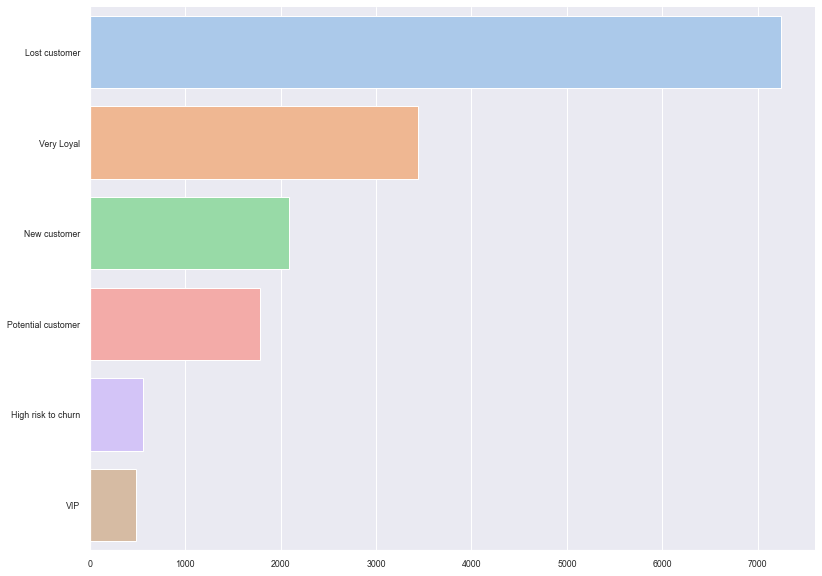

In [87]:
plt.figure(figsize=[13,10])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'pastel')
sns.despine()

In [88]:
rfm_table.describe()

,Recency,Frequency,Monetary,rfm_score
count,15593.000000,15593.000000,15593.000000,15593.000000
mean,341.457577,1.282627,237.563011,277.668890
std,180.237771,0.888884,582.492145,112.314789
min,-1.000000,1.000000,10.890000,111.000000
25%,203.000000,1.000000,72.570000,211.000000
50%,319.000000,1.000000,127.920000,311.000000
75%,477.000000,1.000000,221.790000,411.000000
max,1002.000000,38.000000,25051.890000,444.000000


<AxesSubplot:xlabel='Recency'>

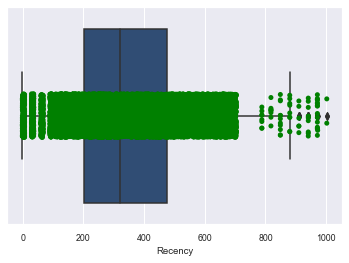

In [89]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'green')

<AxesSubplot:xlabel='Frequency'>

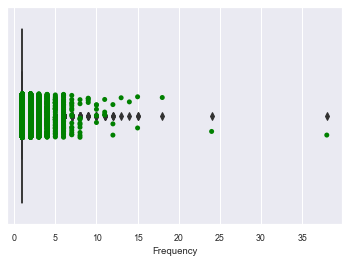

In [90]:
sns.boxplot(x= rfm_table.Frequency)
sns.stripplot(x = rfm_table.Frequency, color= 'green')

<AxesSubplot:xlabel='Monetary'>

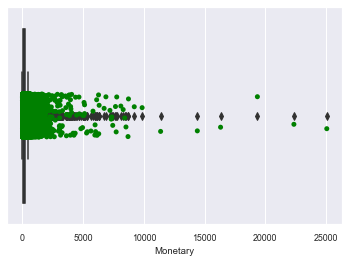

In [91]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'green')

In [92]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequency, 5), np.percentile(rfm_table.Frequency, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 67.0 654.0
Frequancy 5% Outliers Limits: 1.0 3.0
Monetary 5% Outliers Limits: 35.786 713.7099999999999


In [93]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

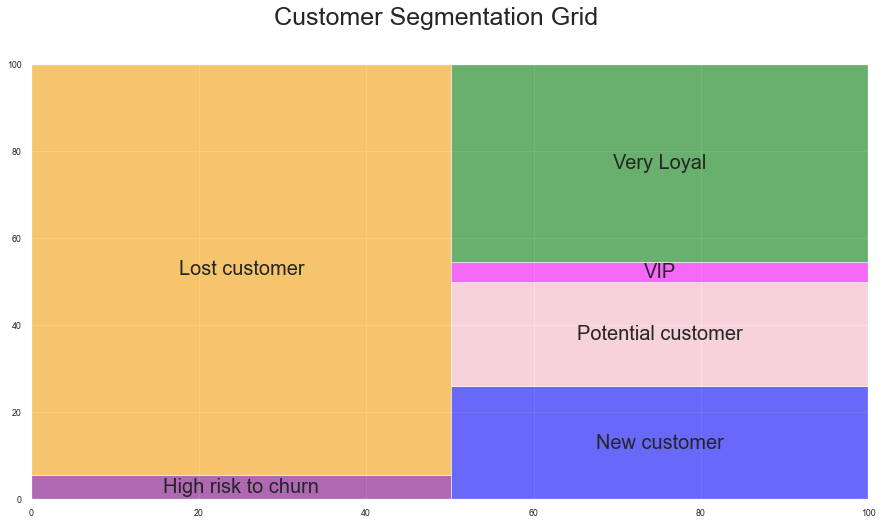

In [94]:
!pip install squarify
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=20)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["purple", "orange", "blue", "pink", "fuchsia", "green", "skyblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

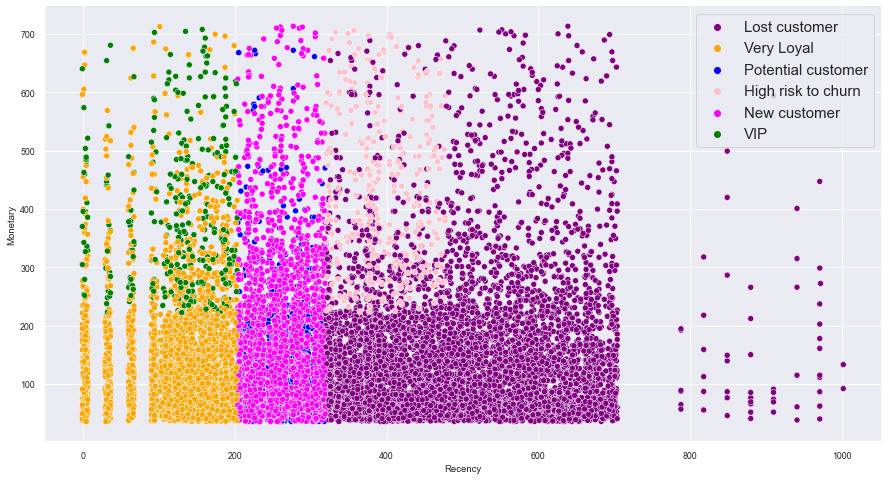

In [95]:
plt.figure(figsize= [15, 8])
colors = ["purple", "orange", "blue", "pink", "fuchsia", "green"]
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':15})
sns.despine()

# Recommendation

In [96]:
#random=df.sample(n=5000)
#random.to_csv('df_test.csv')

In [97]:
df_test=pd.read_csv("df_test.csv")
df_test

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,59131,e460ba12cfe10be96050e2857acf1486,6a1ad41ff798697a116a2c59e5114eb1,29192,aracruz,ES,fa5a7d839b49e173198586f7366939cb,3/6/2017 21:20,6f92416e8dc3d084a65136e05afebc9f,4,...,1,boleto,1,48.69,31255,belo horizonte,MG,computers accessories,Electronics,Satisfied
1,18342,f97344eb0871c942a01e27afbec92beb,862b2c6ccf4352c087cd60cdac498b48,68626,paragominas,PA,3f56a22363145eb59c7fb42254d3f345,1/8/2018 20:30,6d8e095c6a4ef2600a3f61632ccd6fa1,5,...,1,credit card,2,80.14,9780,sao bernardo do campo,SP,sports leisure,Entertainment,Satisfied
2,62216,f1a09318e72e9fb52681f649ff77926c,e8b575ea327ce80b63a741d08990d41c,65370,pindare mirim,MA,91de6d82a66a52cbc3286556438b4705,16/3/2018 21:56,ea4d7685a41b5371bfb28f2f783ee15c,1,...,1,credit card,5,363.29,5303,sao paulo,SP,computers accessories,Electronics,Not Satisfied
3,106556,cb1e2bf26acb98ef66bb11447a218cc2,6fd9de387d337ad313a16b4c591ca753,41920,salvador,BA,d2741de337666d1bb01913f415e6643f,25/2/2017 14:34,2185a313343516f767815fe6e3ef6058,4,...,1,credit card,1,36.77,26525,nilopolis,RJ,food,Food & Drinks,Satisfied
4,33548,e4746f45c535eb374011aa4cf48f0a42,8eaf27a884ddf505b257915eeff2f001,90050,porto alegre,RS,448a8d1f2ea019c4016c1e6f75d01dc7,29/11/2017 11:10,4a2b9088fbf584a34d39e050a23666e6,5,...,1,boleto,1,202.66,93180,portao,RS,housewares,Home & Garden,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24100,10c9c37bffaf8c3b0d16ba1d3f338ca9,f0de20dfa8c975f524fadbc8c7b53254,18077,sorocaba,SP,a836557bd25acb961f6381da4f877fd0,4/4/2018 12:36,34f9e8939532c1d9a0bbe3313c7040dd,5,...,1,boleto,1,72.76,15025,sao jose do rio preto,SP,sports leisure,Entertainment,Satisfied
4996,105381,1c37caf11970a567b7fa4a716175d250,34b02e69444e6e159c83d7d6936fb216,18570,conchas,SP,bf42ba647cf1164c3f1f5757b3f0cbd1,23/12/2017 12:41,dabd9172c6ec55dc973a5189902b6523,4,...,1,boleto,1,81.99,14400,franca,SP,fixed telephony,Electronics,Satisfied
4997,105805,0d785812b68075d9a8655a1b99838b3d,8899f4c1b151858232ffbecbbb8da8f5,4003,sao paulo,SP,407d3134dc85d0544ca41fda99cb3ca6,27/1/2018 19:53,69e96f1078d47c5f4fc60542cc9c71de,5,...,1,credit card,2,57.43,11701,praia grande,SP,drinks,Food & Drinks,Satisfied
4998,105853,028b14fcf4455f6be9930c762c27389d,94e5e0769581c41adcbdafb419e6f72c,79021,campo grande,MS,60535257c5bf7cd3e7cb86e1c824809e,22/12/2017 11:13,1a08489b7793385d92544d17d0cd21bb,4,...,1,credit card,1,73.65,11701,praia grande,SP,drinks,Food & Drinks,Satisfied


In [98]:
df_test=pd.DataFrame(df_test)
df_test

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
0,59131,e460ba12cfe10be96050e2857acf1486,6a1ad41ff798697a116a2c59e5114eb1,29192,aracruz,ES,fa5a7d839b49e173198586f7366939cb,3/6/2017 21:20,6f92416e8dc3d084a65136e05afebc9f,4,...,1,boleto,1,48.69,31255,belo horizonte,MG,computers accessories,Electronics,Satisfied
1,18342,f97344eb0871c942a01e27afbec92beb,862b2c6ccf4352c087cd60cdac498b48,68626,paragominas,PA,3f56a22363145eb59c7fb42254d3f345,1/8/2018 20:30,6d8e095c6a4ef2600a3f61632ccd6fa1,5,...,1,credit card,2,80.14,9780,sao bernardo do campo,SP,sports leisure,Entertainment,Satisfied
2,62216,f1a09318e72e9fb52681f649ff77926c,e8b575ea327ce80b63a741d08990d41c,65370,pindare mirim,MA,91de6d82a66a52cbc3286556438b4705,16/3/2018 21:56,ea4d7685a41b5371bfb28f2f783ee15c,1,...,1,credit card,5,363.29,5303,sao paulo,SP,computers accessories,Electronics,Not Satisfied
3,106556,cb1e2bf26acb98ef66bb11447a218cc2,6fd9de387d337ad313a16b4c591ca753,41920,salvador,BA,d2741de337666d1bb01913f415e6643f,25/2/2017 14:34,2185a313343516f767815fe6e3ef6058,4,...,1,credit card,1,36.77,26525,nilopolis,RJ,food,Food & Drinks,Satisfied
4,33548,e4746f45c535eb374011aa4cf48f0a42,8eaf27a884ddf505b257915eeff2f001,90050,porto alegre,RS,448a8d1f2ea019c4016c1e6f75d01dc7,29/11/2017 11:10,4a2b9088fbf584a34d39e050a23666e6,5,...,1,boleto,1,202.66,93180,portao,RS,housewares,Home & Garden,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24100,10c9c37bffaf8c3b0d16ba1d3f338ca9,f0de20dfa8c975f524fadbc8c7b53254,18077,sorocaba,SP,a836557bd25acb961f6381da4f877fd0,4/4/2018 12:36,34f9e8939532c1d9a0bbe3313c7040dd,5,...,1,boleto,1,72.76,15025,sao jose do rio preto,SP,sports leisure,Entertainment,Satisfied
4996,105381,1c37caf11970a567b7fa4a716175d250,34b02e69444e6e159c83d7d6936fb216,18570,conchas,SP,bf42ba647cf1164c3f1f5757b3f0cbd1,23/12/2017 12:41,dabd9172c6ec55dc973a5189902b6523,4,...,1,boleto,1,81.99,14400,franca,SP,fixed telephony,Electronics,Satisfied
4997,105805,0d785812b68075d9a8655a1b99838b3d,8899f4c1b151858232ffbecbbb8da8f5,4003,sao paulo,SP,407d3134dc85d0544ca41fda99cb3ca6,27/1/2018 19:53,69e96f1078d47c5f4fc60542cc9c71de,5,...,1,credit card,2,57.43,11701,praia grande,SP,drinks,Food & Drinks,Satisfied
4998,105853,028b14fcf4455f6be9930c762c27389d,94e5e0769581c41adcbdafb419e6f72c,79021,campo grande,MS,60535257c5bf7cd3e7cb86e1c824809e,22/12/2017 11:13,1a08489b7793385d92544d17d0cd21bb,4,...,1,credit card,1,73.65,11701,praia grande,SP,drinks,Food & Drinks,Satisfied


In [99]:
df_test.drop(columns=['Unnamed: 0'],axis=1)
df_test.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_purchase_timestamp', 'review_id', 'review_score',
       'review_comment_message', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'product_category_name', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'product_category', 'review'],
      dtype='object')

In [100]:
matrix=df_test.pivot_table(index='customer_id', columns='product_id', values='review_score', fill_value=0)

In [101]:
matrix

product_id,002159fe700ed3521f46cfcf6e941c76,005030ef108f58b46b78116f754d8d38,006baa9a5b8f95895f15273a35bc2664,00878d953636afec00d3e85d55a12e7f,00905d58c87afcbce21420b3712cacaa,0092a9e1c8a471753ed7ffa7eef5086e,009af1277432f1a05742df69cdf72d1e,009c09f439988bc06a93d6b8186dce73,00de7f393d962717eeeb2d7131a40dba,00e32638060f6356e6f00749dc466b5c,...,ff92ca9bb0b3f4ec00a9b76c9f68cb3a,ffa4027b0effa4df0d5f5a9ce2788b6d,ffa7e0cbe11656d11a117b534bb1db27,ffa8916ae85546ee99d1965b28e447ae,ffaf0af7eebb57c7f262b51ebb05dfd6,ffccf0ce5eff1a158891296990107d08,ffe0fc4e02c3559643ac063fa5cf9d07,ffef256879dbadcab7e77950f4f4a195,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
customer_id,,,,,,,,,,,,,,,,,,,,,
0026d252429f669d454d726e5e956aa1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002c625393dfa194828b462a6ef8cb0b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030aded3a67b29946a128ee8468388e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0034f7933de3ead6bd9ba49afe95f119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0041d7b768cb115092fa0f5d55638d06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb0ffdb00e2e0b31c423577db3520eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffcd14ed59af25129b69e7225a599db9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffdd4677bd8a69327e992b213efddf61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X=matrix.T.corr()
X.head()

customer_id,0026d252429f669d454d726e5e956aa1,002c625393dfa194828b462a6ef8cb0b,0030aded3a67b29946a128ee8468388e,0034f7933de3ead6bd9ba49afe95f119,0041d7b768cb115092fa0f5d55638d06,00426311a53f3c052943c88b692a3be2,00581d55862aecc8cbc7d701a27bc285,0068a2209e2c7631566539fef4331bf8,0074a15febc9459ab2f999ea0e22c8d6,00838729460c2110a0bd330a4bb9b332,...,ff7b32d3da9ed589c9695bc56021b10d,ff83d65f64369c7efaa074eb0a13c433,ff9ec39d2bb09243f0139f792ad1ec7b,ff9fb29b08ea8f4564e23dac02a225fa,ffa6c1b1855a12e84bae4eb85a60fc2a,ffb0ffdb00e2e0b31c423577db3520eb,ffcd14ed59af25129b69e7225a599db9,ffdd4677bd8a69327e992b213efddf61,fff5dd22d522cf28a902185817642a2e,fffecc9f79fd8c764f843e9951b11341
customer_id,,,,,,,,,,,,,,,,,,,,,
0026d252429f669d454d726e5e956aa1,1.000000,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269
002c625393dfa194828b462a6ef8cb0b,-0.000269,1.000000,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269
0030aded3a67b29946a128ee8468388e,-0.000269,-0.000269,1.000000,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269
0034f7933de3ead6bd9ba49afe95f119,-0.000269,-0.000269,-0.000269,1.000000,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269
0041d7b768cb115092fa0f5d55638d06,-0.000269,-0.000269,-0.000269,-0.000269,1.000000,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,...,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269,-0.000269


In [103]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

ImportError: cannot import name 'ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (d:\Anaconda\lib\site-packages\sklearn\base.py)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
correlation_matrix

array([[1.        , 1.        , 0.99959021, ..., 1.        , 0.99959021,
        1.        ],
       [1.        , 1.        , 0.99959021, ..., 1.        , 0.99959021,
        1.        ],
       [0.99959021, 0.99959021, 1.        , ..., 0.99959021, 1.        ,
        0.99959021],
       ...,
       [1.        , 1.        , 0.99959021, ..., 1.        , 0.99959021,
        1.        ],
       [0.99959021, 0.99959021, 1.        , ..., 0.99959021, 1.        ,
        0.99959021],
       [1.        , 1.        , 0.99959021, ..., 1.        , 0.99959021,
        1.        ]])

In [ ]:
#user_similarity=X.T.corr()
#user_similarity

In [ ]:
n = input("Enter your ID: ")

In [ ]:
i=n

customer_ID = list(X.index)
customer_indx = customer_ID.index(i)
customer_indx

3

In [ ]:
correlation_customer_ID = correlation_matrix[customer_indx]
correlation_customer_ID.shape

(4935,)

In [ ]:
Recommend = list(X.index[correlation_customer_ID > 0.5])

#remove the customer in list
Recommend.remove(i) 

#top 10 similar users to customer
list2=Recommend[0:10]
list2

['0026d252429f669d454d726e5e956aa1',
 '002c625393dfa194828b462a6ef8cb0b',
 '0030aded3a67b29946a128ee8468388e',
 '0041d7b768cb115092fa0f5d55638d06',
 '00426311a53f3c052943c88b692a3be2',
 '00581d55862aecc8cbc7d701a27bc285',
 '0068a2209e2c7631566539fef4331bf8',
 '0074a15febc9459ab2f999ea0e22c8d6',
 '00838729460c2110a0bd330a4bb9b332',
 '00a1edfeac0ce7adf9357b89c9659eb2']

In [ ]:
result = df_test[df_test['customer_id'].isin(list2)]
result

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,review_id,review_score,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,review
1238,65318,00a1edfeac0ce7adf9357b89c9659eb2,0fa9d11d5ad31c53125b31b3f9fa5398,75533,itumbiara,GO,cc91ae24c277f0bfc31ff525577f8cd4,25/10/2017 16:47,d83fce4320be9cf0c825e8dd48fd7e14,5,...,1,credit card,1,112.82,38440,araguari,MG,consoles games,Electronics,Satisfied
1256,4417,0030aded3a67b29946a128ee8468388e,a961e198a1d400e99c02e8f4520f763c,8450,sao paulo,SP,7afca88a125dd0c2b912bbf82c0496a4,23/11/2017 21:18,d2c096147a2da493211ada11527ef085,1,...,1,credit card,2,58.59,14940,ibitinga,SP,furniture decor,Furniture,Not Satisfied
1397,107567,0074a15febc9459ab2f999ea0e22c8d6,526807e2a25ea0db271efcc9fc646db1,29072,vitoria,ES,3c12bc6e3b1b88c14e55b9c38fddecf6,28/11/2017 14:43,13b19afc180b2098279ca4666dc3b81f,1,...,1,boleto,1,425.24,82810,curitiba,PR,agro industry and commerce,Industry & Construction,Not Satisfied
1472,38947,0026d252429f669d454d726e5e956aa1,6cd042e0832c40d2eebf82b2521a8487,13860,aguai,SP,1839b1db32d5ea90a7fc3ca19bdd16ad,9/11/2017 16:08,680cceb79d756ba137bddf4aa071572e,4,...,1,credit card,3,139.15,14940,ibitinga,SP,bed bath table,Furniture,Satisfied
1795,32106,00581d55862aecc8cbc7d701a27bc285,f794c59a46dc4872d97d173c1b51525a,45818,trancoso,BA,6e3083ad9ca7d53cf66f1cd74bb3d67d,29/3/2018 9:09,bc5d28bb6b74adc32b8ff5760f8c639a,5,...,1,credit card,1,287.54,17052,bauru,SP,housewares,Home & Garden,Satisfied
2056,95452,00838729460c2110a0bd330a4bb9b332,d3857f98166ef23ca95d44cbe9b1828c,74063,goiania,GO,81f8f469c9ebd7916d4d35d7b379127c,24/3/2018 7:54,bfaf50592ef488342f8991167d6cb910,5,...,1,credit card,1,5.13,4160,sao paulo,SP,telephony,Electronics,Satisfied
2444,85801,002c625393dfa194828b462a6ef8cb0b,46a19a5b29624c9be39b41ab02b12b39,58102,cabedelo,PB,86be4ae55b020c490fa71d3a9d9af442,19/11/2017 13:22,902afe191efb67101544ed844186598a,5,...,1,credit card,6,371.87,17504,marilia,SP,home construction,Furniture,Satisfied
2741,79104,0068a2209e2c7631566539fef4331bf8,43f7616a8f37a874ee893f0dea3ba593,38550,coromandel,MG,d346370ba346967892986f57438f7765,19/5/2017 9:39,20530ba47e52baa78a0b46b7c9f74bbc,2,...,1,boleto,1,34.09,1031,sao paulo,SP,health beauty,Beauty & Health,Not Satisfied
3802,22290,00426311a53f3c052943c88b692a3be2,aed838b04abeb2fb94566d0a073bd718,4551,sao paulo,SP,3c74b996c9db669050e3daf79f49d71d,13/12/2017 15:35,ca0f58273b7f184da4d00b5a5041e9fa,4,...,1,credit card,1,273.66,89460,canoinhas,SC,sports leisure,Entertainment,Satisfied
4454,114504,0041d7b768cb115092fa0f5d55638d06,a2acf58dde7a492ea0fa65b16c530a78,32604,betim,MG,9b6f76f13e1e4d0d84297002186af20f,10/3/2018 22:11,5d2bc18524dcf9d0a378a2db28c56e67,5,...,1,credit card,8,81.32,19013,presidente prudente,SP,books technical,Books & Stationery,Satisfied


In [ ]:
print('These are some item categories recommendations for you,\n', result['product_category_name_english'].sample(n=5))

These are some item categories recommendations for you,
 1795                    housewares
1256               furniture decor
1397    agro industry and commerce
1238                consoles games
2444             home construction
Name: product_category_name_english, dtype: object


In [ ]:
pip install pyimage



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk, Image
from functools import partial
import pandas as pd

# Sample DataFrame (Replace this with your actual DataFrame)
df = pd.read_csv('df_test.csv')


def validateLogin(id):
    customer_id = str(id.get())
    customer_unique_id = df.loc[df['customer_id'] == customer_id, 'Unique ID'].values
    if len(customer_unique_id) > 0:
        print("Customer Unique ID:", customer_unique_id[0])
    else:
        messagebox.showerror("Error", "Customer ID not found!")

root = tk.Tk()
root.title('Customer Login')
root.geometry('500x500')
root.configure(bg='#fff')
root.resizable(False, False)

# Load the image using PIL
background_image = Image.open("img.png")
background_image = ImageTk.PhotoImage(background_image)

# Create a label to display the background image
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

idLabel = Label(root, text="Customer ID")
idLabel.place(relx=0.4, rely=0.4, anchor=CENTER)

id = StringVar()
idEntry = Entry(root, textvariable=id)
idEntry.place(relx=0.6, rely=0.4, anchor=CENTER)

validateLogin = partial(validateLogin, id)

loginButton = Button(root, text="Login", command=validateLogin)
loginButton.place(relx=0.5, rely=0.5, anchor=CENTER)

# Attach the image to the root window to keep the reference
root.image = background_image

root.mainloop()

In [ ]:
#tkinter._test()